### Installing and Loading Packages

In [23]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

library(dplyr)
library(ggplot2)
library(dslabs)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



## Part 1 - Divorce Rate and Margarine Consumption

In [9]:
data(divorce_margarine)
head(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


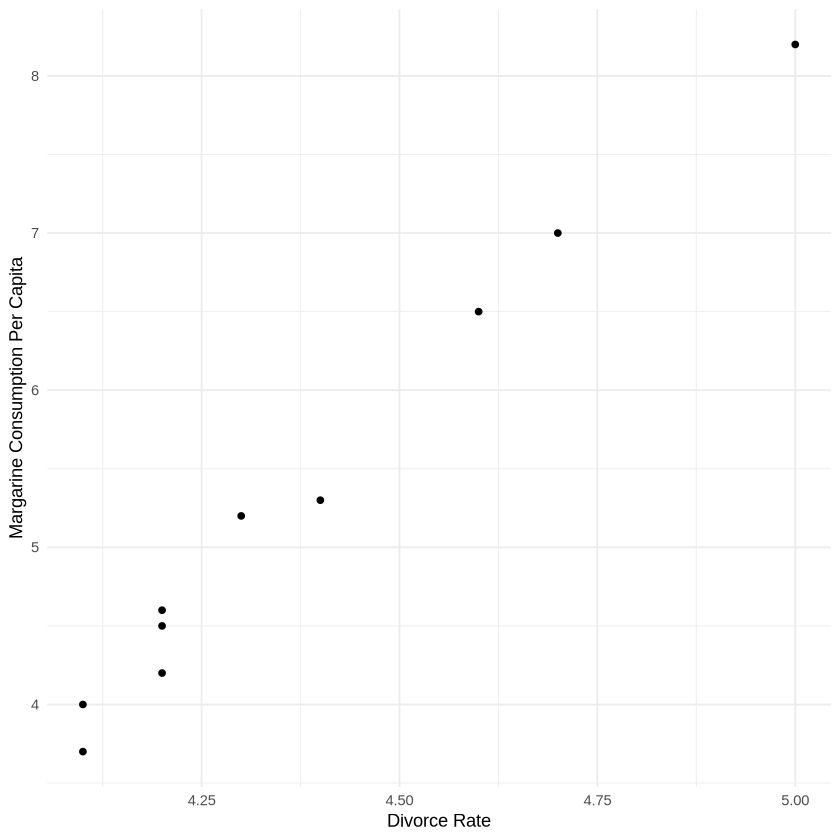

In [13]:
ggplot(divorce_margarine, aes(x=divorce_rate_maine, y=margarine_consumption_per_capita))+
    geom_point()+
    xlab("Divorce Rate") + 
    ylab("Margarine Consumption Per Capita") +
    theme_minimal()

In [17]:
cor.test(divorce_margarine$divorce_rate_maine, divorce_margarine$margarine_consumption_per_capita)


	Pearson's product-moment correlation

data:  divorce_margarine$divorce_rate_maine and divorce_margarine$margarine_consumption_per_capita
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


We can conclude that the two variables of margarine consumption and divorce rate are significantly correlated as the p-value is less than 0.05 and the correlation coefficient is very close to 1, which indicates a strong positive correlation. 

## Part 2 - English Vocabulary Test

In [26]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [27]:
data(GSSvocab)
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [28]:
#Filter for the year 1978and remove rows with missing value
GSSvocab1978 <- GSSvocab %>%
    filter(year == 1978)

NAfreeGSSvocab1978 <- na.omit(GSSvocab1978)

In [29]:
#Is a person’ score on the vocabulary test (‘vocab’) significantly impacted by their level of education (‘educ’)? 
cor.test(NAfreeGSSvocab1978$vocab, NAfreeGSSvocab1978$educ, method = 'pearson')


	Pearson's product-moment correlation

data:  NAfreeGSSvocab1978$vocab and NAfreeGSSvocab1978$educ
t = 24.443, df = 1475, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4996008 0.5722586
sample estimates:
      cor 
0.5369246 


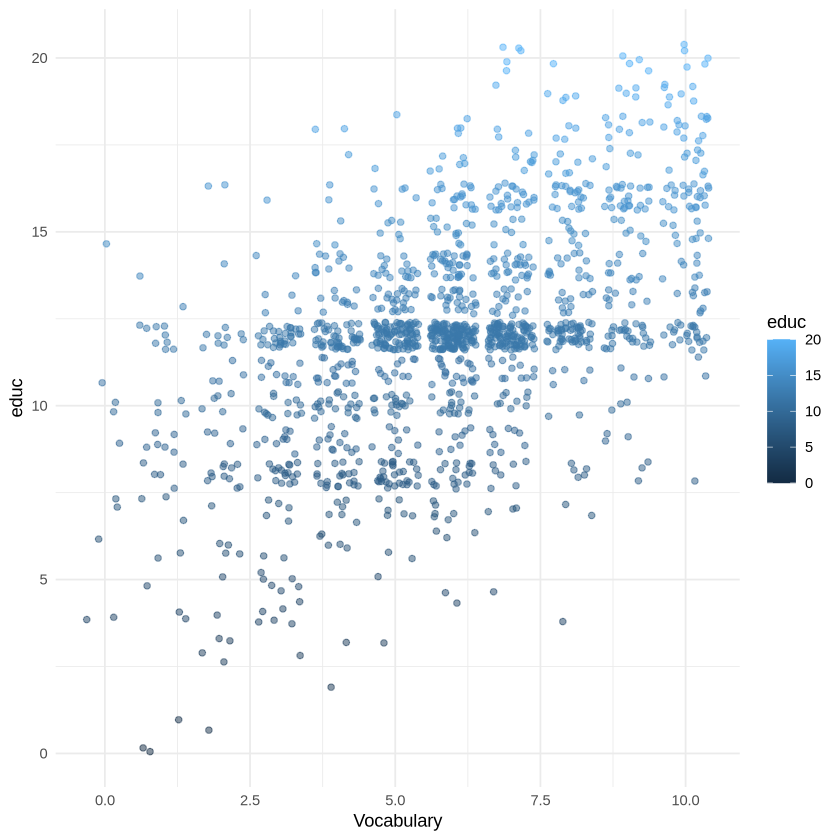

In [54]:
ggplot(NAfreeGSSvocab1978, aes(x=vocab, y=educ, col = educ))+
    geom_jitter(alpha = 0.5)+
    xlab("Vocabulary") +
    theme_minimal()

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


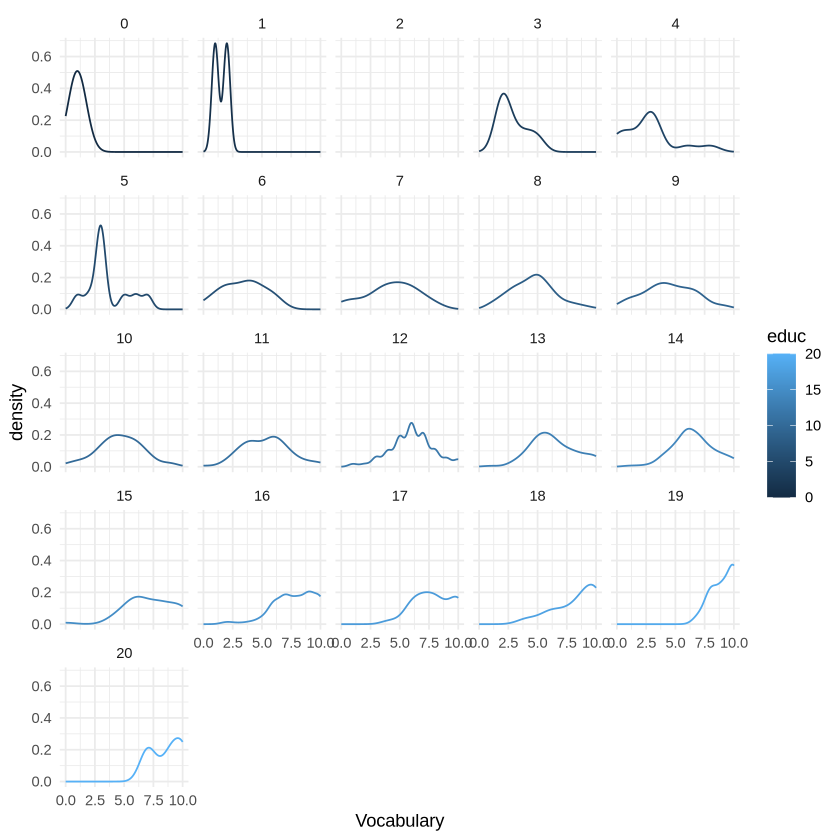

In [51]:
#Visualize the relationship in a plot and build a model. Briefly explain the results.
ggplot(NAfreeGSSvocab1978, aes(vocab, col = educ))+
    geom_density(alpha = 0.5)+
    xlab("Vocabulary") +
    theme_minimal() + 
    facet_wrap(~educ)

#### Explanation
blablabal

In [63]:
#build a model
model <- lm(vocab ~ educ, data = NAfreeGSSvocab1978)
summary(model)


Call:
lm(formula = vocab ~ educ, data = NAfreeGSSvocab1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16



Call:
lm(formula = vocab ~ educ + nativeBorn, data = NAfreeGSSvocab1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


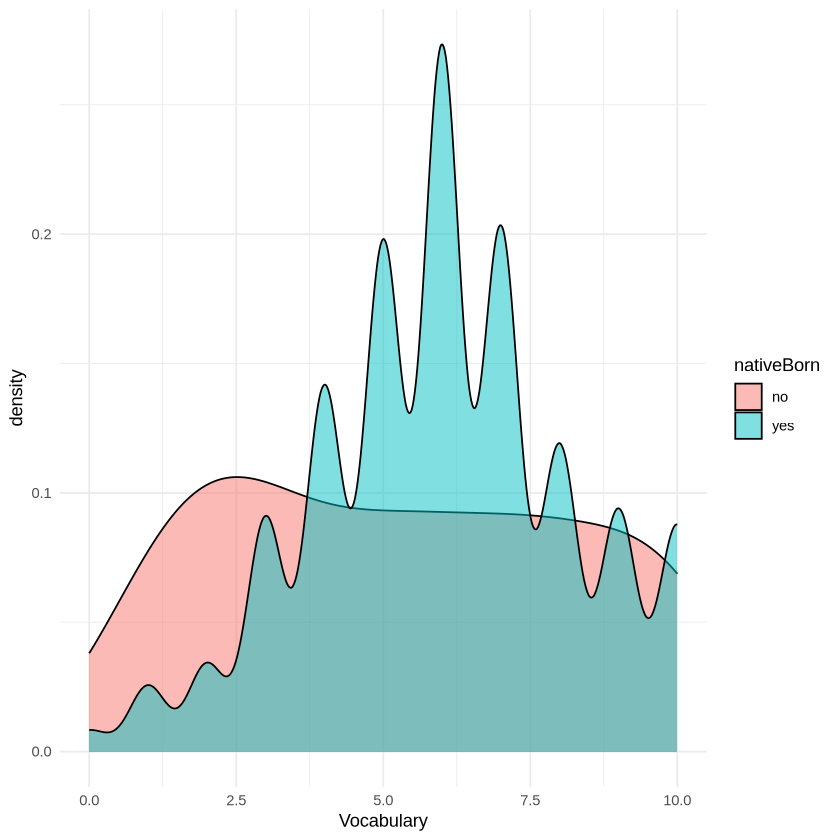

In [56]:
#Whether a person is the native of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. 
#Visualize the relationship and add the predictor to the model. Briefly explain theresults.
ggplot(NAfreeGSSvocab1978, aes(x=vocab, fill = nativeBorn))+
    geom_density(alpha = 0.5)+
    xlab("Vocabulary") +
    theme_minimal() 
    #facet_wrap(~nativeBorn)

model2 <- lm(vocab ~ educ + nativeBorn, data = NAfreeGSSvocab1978)
summary(model2)

#### Explanation
blabla


Call:
lm(formula = vocab ~ educ * nativeBorn, data = NAfreeGSSvocab1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


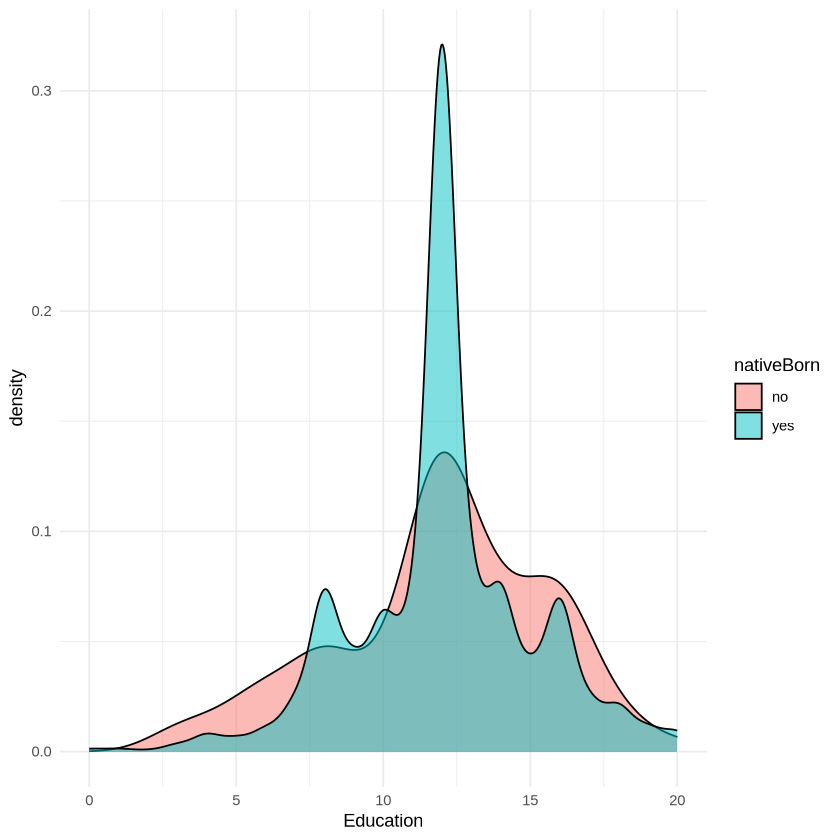

In [61]:
#Does a person’s level of education depend on whether they are a native of the country? 
#Visualize the relationship. Do you think it makes sense to add the relationship as an interactionterm? 
#Try creating the model and briefly explain the results
ggplot(NAfreeGSSvocab1978, aes(x= educ, fill= nativeBorn))+
    geom_density(alpha = 0.5)+
    xlab("Education") +
    theme_minimal()

model3 <- lm(vocab ~ educ*nativeBorn, data = NAfreeGSSvocab1978)
summary(model3)

#### Explanation
blablabla

In [66]:
#Which model performs best
anova(model, model2, model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


#### Explanation
This model performs better than this as it ....
Does this mean that model2 is the best performing model? As this model is significantly better than the previous? 